# 母婴用品销售数据分析
数据来源于阿里天池

随着国家开放二胎政策，婴儿市场规模也在不断的扩大，根据淘宝天猫的婴儿用品购买情况，对产品进行多维度分析，分析市场需求，定位产品方向，从而在满足市场需求的同时，提高销量。

## 一、读取数据

In [127]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot  as plt
import datetime
from datetime import datetime
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']  #指定默认字体  
plt.rcParams['axes.unicode_minus']=False  #解决负号'-'显示为方块的问题
%matplotlib inline

In [96]:
g_data = pd.read_csv('(sample)sam_tianchi_mum_baby  (2).csv')
b_data = pd.read_csv('(sample)sam_tianchi_mum_baby  (1).csv')

In [97]:
g_data.head()

,user_id,auction_id,cat_id,cat1,property,buy_mount,day_,day
0,786295544,41098319944,50014866,50022520,21458:86755362;13023209:3593274;10984217:21985...,2,20140919,2014-09-19
1,532110457,17916191097,50011993,28,21458:11399317;1628862:3251296;21475:137325;16...,1,20131011,2013-10-11
2,249013725,21896936223,50012461,50014815,21458:30992;1628665:92012;1628665:3233938;1628...,1,20131011,2013-10-11
3,917056007,12515996043,50018831,50014815,21458:15841995;21956:3494076;27000458:59723383...,2,20141023,2014-10-23
4,444069173,20487688075,50013636,50008168,21458:30992;13658074:3323064;1628665:3233941;1...,1,20141103,2014-11-03


In [98]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 8 columns):
user_id       29971 non-null int64
auction_id    29971 non-null int64
cat_id        29971 non-null int64
cat1          29971 non-null int64
property      29827 non-null object
buy_mount     29971 non-null int64
day_          29971 non-null int64
day           29971 non-null object
dtypes: int64(6), object(2)
memory usage: 1.8+ MB


In [99]:
b_data.head()

,user_id,birthday,gender,birthday1
0,2757,20130311,1,2013-03-11
1,415971,20121111,0,2012-11-11
2,1372572,20120130,1,2012-01-30
3,10339332,20110910,0,2011-09-10
4,10642245,20130213,0,2013-02-13


In [100]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 4 columns):
user_id      953 non-null int64
birthday     953 non-null int64
gender       953 non-null int64
birthday1    953 non-null object
dtypes: int64(3), object(1)
memory usage: 29.9+ KB


- 购买商品表字段信息：用户ID 商品ID 商品二级分类 商品一级分类 商品属性 购买数量 购买日期

- 婴儿信息表字段信息：用户ID 出生日期 性别

## 二、数据清洗

In [101]:
#商品属性暂无办法具体分析，因此去除
g_data = g_data[['user_id','auction_id','cat_id','cat1','buy_mount','day']]

In [102]:
g_data['day'] = pd.to_datetime(g_data['day'])

In [103]:
#将两表进行联结,因只有部分婴儿的信息，所以后续婴儿相关分析，只针对存在的信息
data = pd.merge(g_data,b_data,how = 'outer',on = 'user_id')

In [104]:
#异常值处理 gender值为0代表女，1代表男，2代表未知。按男女比为438：489进行等比例替换
data[data['gender']==2].count()

user_id       26
auction_id    26
cat_id        26
cat1          26
buy_mount     26
day           26
birthday      26
gender        26
birthday1     26
dtype: int64

In [105]:
#有26个异常值，因此12个替换成1，14个替换成0
for i in range(len(data)):
    for g in range(len(data[data['gender']==2])):
        if data['gender'][i]==2:
            if g<12:
                data.iloc[i,7] = 1
            else:
                data.iloc[i,7] = 0
       

## 三、数据分析

In [106]:
#统计老用户复购次数
data['user_id'].value_counts()

814316568     4
50570082      2
213455117     2
69889555      2
1954450396    2
890739828     2
675043151     2
1039632779    2
371804010     2
900655351     2
1126907662    2
316403637     2
73181079      2
151414264     2
1137719147    2
116466705     2
889177953     2
613315428     2
14069200      2
718313786     2
775005980     2
21833701      2
473068583     2
57700536      2
93538756      2
65500031      1
68466172      1
183827        1
360898065     1
469548541     1
             ..
210670535     1
13024194      1
648766522     1
678601665     1
197842455     1
59192211      1
717360020     1
47387543      1
12060212      1
227820445     1
469916574     1
783307679     1
1970900317    1
1840751521    1
2199815077    1
57684549      1
1083541638    1
132836264     1
2382160809    1
51248042      1
274396075     1
848022444     1
860105648     1
745409460     1
784997302     1
25760695      1
205880250     1
773802940     1
81907104      1
53183171      1
Name: user_id, Length: 2

- 统计发现老用户复购率特别低，因此忽略，直接由新用户进行分析

In [107]:
dt = data['day'].astype('str')
dt = dt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
data['Year'] = dt.map(lambda x:x.year)
data['Month'] = dt.map(lambda x:x.month)
data['Day'] = dt.map(lambda x:x.day)

In [108]:
data['YearMonth'] = data['Year'].astype('str')+'-'+data['Month'].astype('str')
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

<function matplotlib.pyplot.show(*args, **kw)>

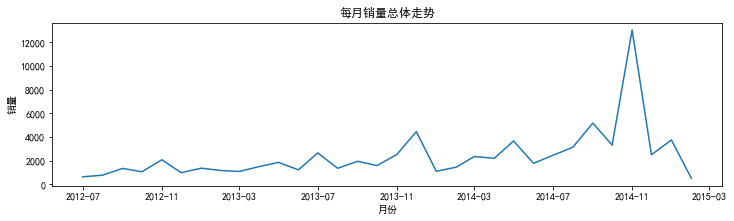

In [109]:
#商品的总体走势
month_sale = data.groupby('YearMonth')['buy_mount'].sum()
plt.figure(figsize=(12,3))
plt.plot(month_sale)
plt.xlabel('月份')
plt.ylabel('销量')
plt.title('每月销量总体走势')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

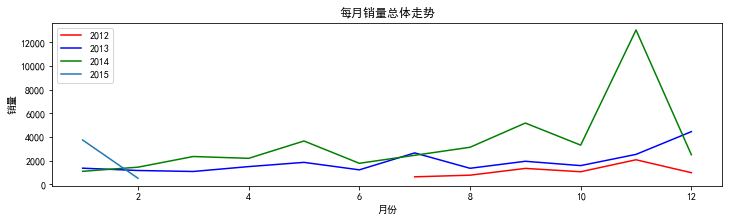

In [110]:
#商品每个月的走势对比
monsale2012 = data[data['Year'] == 2012].groupby('Month')['buy_mount'].sum()
monsale2013 = data[data['Year'] == 2013].groupby('Month')['buy_mount'].sum()
monsale2014 = data[data['Year'] == 2014].groupby('Month')['buy_mount'].sum()
monsale2015 = data[data['Year'] == 2015].groupby('Month')['buy_mount'].sum()
plt.figure(figsize=(12,3))
plt.plot(monsale2012,color = 'r',label = '2012')
plt.plot(monsale2013,color = 'b',label = '2013')
plt.plot(monsale2014,color = 'g',label = '2014')
plt.plot(monsale2015,label = '2015')
plt.xlabel('月份')
plt.ylabel('销量')
plt.title('每月销量总体走势')
plt.legend(loc = 2)
plt.show


- 通过走势分析，在每年的5、9、11月份都有不同程度的高峰凸起，整体呈现上涨趋势，接下来分析，为什么销量上涨

- 这里可以采用**4P营销理论**,利用**假设验证法**，分别从产品、价格、渠道、宣传，四个方面进行分析。

**产品维度**

假设：新增产品类带来销量的上升  
收集证据：下面是每年各月的二级分类商品数目对比

<function matplotlib.pyplot.show(*args, **kw)>

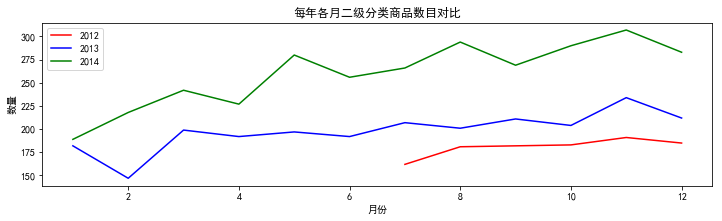

In [111]:
data['cat_unique'] = data['Year'].astype('str')+data['Month'].astype('str')+data['cat_id'].astype('str')
cat_2012 = data[data['Year'] == 2012][['cat_unique','Month']].drop_duplicates(['cat_unique']).groupby('Month')['cat_unique'].count()
cat_2013 = data[data['Year'] == 2013][['cat_unique','Month']].drop_duplicates(['cat_unique']).groupby('Month')['cat_unique'].count()
cat_2014 = data[data['Year'] == 2014][['cat_unique','Month']].drop_duplicates(['cat_unique']).groupby('Month')['cat_unique'].count()
plt.figure(figsize=(12,3))
plt.plot(cat_2012,color = 'r',label = '2012')
plt.plot(cat_2013,color = 'b',label = '2013')
plt.plot(cat_2014,color = 'g',label = '2014')
plt.xlabel('月份')
plt.ylabel('数量')
plt.title('每年各月二级分类商品数目对比')
plt.legend(loc = 2)
plt.show


可以看出，2014年5月，11月商品数目有所增加，2013年和2012年有缓慢的上升趋势，但是由于这个是订单数据，这些商品也只是获取的购买到的商品数目，所以不太准确，建议可根据公司实际市场部的商品数据进行二次验证，因此假设不成立。

**价格维度**

假设：假设：降价带来的销量上涨  

收集证据：  

由于案例中没有涉及到价格相关数据，因此假定平均价格保持稳定，对销量影响不大，因此假设不成立。

**渠道维度**

假设：新增渠道带来销量上涨  

收集证据：  

根据每年个月的走势图，我们发现，仅仅是在5,9,11存在波峰，之后前后月份都会有所下降，所以如果是渠道增加，应该是一个持续上涨的趋势，所以推断假设不成立，案例中没有相关数据，实际工作中，可获取渠道数据进行验证，所以，在本案例中，假设不成立。

**宣传维度**

宣传维度主要包括品牌宣传，公关，促销等，这里只分析促销  

假设：由于促销活动带来销量上涨 

收集证据：

先看5月数据

<function matplotlib.pyplot.show(*args, **kw)>

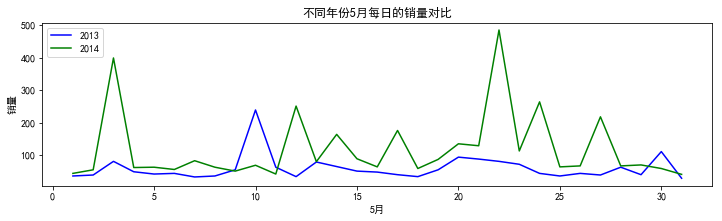

In [112]:
monsale201305 = data[(data['Year'] == 2013) & (data['Month'] == 5)].groupby('Day')['buy_mount'].sum()
monsale201405 = data[(data['Year'] == 2014) & (data['Month'] == 5)].groupby('Day')['buy_mount'].sum()
plt.figure(figsize=(12,3))
plt.plot(monsale201305,color = 'b',label = '2013')
plt.plot(monsale201405,color = 'g',label = '2014')
plt.xlabel('5月')
plt.ylabel('销量')
plt.title('不同年份5月每日的销量对比')
plt.legend(loc = 2)
plt.show


从图中可以看出2014年在5月3日，5月12日，5月22日都有明显的波动，特别是在5月22日，核证后，5月1日-5月3日（劳动节）、5月11日（母亲节）及5月20日（表白节）淘宝天猫均做促销；13年5月数据在5月3号，5月10号和5月20号也都有所上涨，说明受到节日促销的可能性很大。

接下来再看9月数据

<function matplotlib.pyplot.show(*args, **kw)>

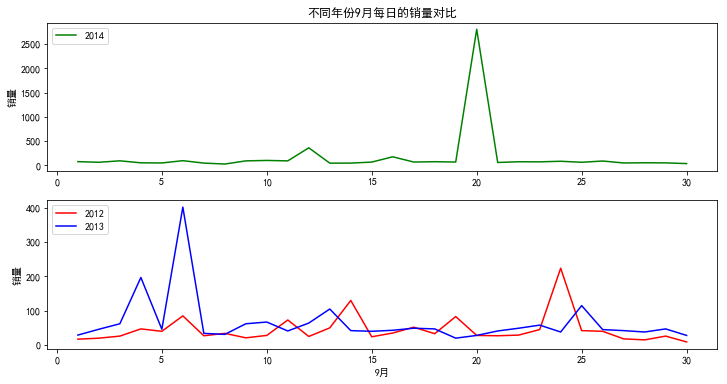

In [113]:
monsale201209 = data[(data['Year'] == 2012) & (data['Month'] == 9)].groupby('Day')['buy_mount'].sum()
monsale201309 = data[(data['Year'] == 2013) & (data['Month'] == 9)].groupby('Day')['buy_mount'].sum()
monsale201409 = data[(data['Year'] == 2014) & (data['Month'] == 9)].groupby('Day')['buy_mount'].sum()
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,1,1)
plt.plot(monsale201409,color = 'g',label = '2014')
plt.ylabel('销量')
ax1.set_title('不同年份9月每日的销量对比')
plt.legend(loc = 2)

ax2 = plt.subplot(2,1,2)
plt.plot(monsale201209,color = 'r',label = '2012')
plt.plot(monsale201309,color = 'b',label = '2013')
plt.xlabel('9月')
plt.ylabel('销量')
plt.legend(loc = 2)
plt.show


2014年在9月20号达到一个很大的波峰，2012年和2013年也有不同程度的波峰，考虑到每年的9月都会有中秋的节日，可能会不定期搞促销活动，但是9月20日并没有什么节假日或者活动日，经核查，有一笔订单，一次性订购了2748件，属于偶然事件，不作为分析范围。

<function matplotlib.pyplot.show(*args, **kw)>

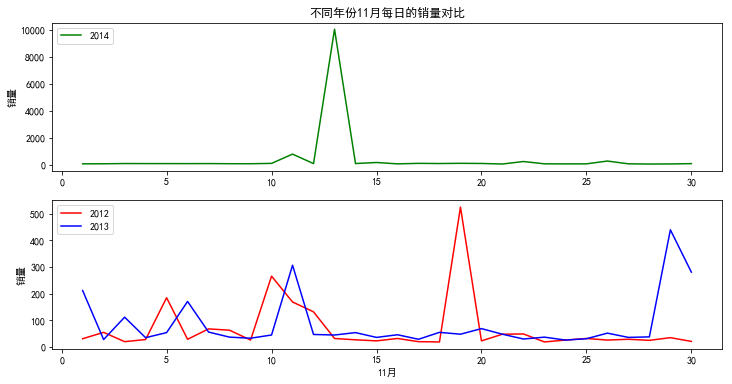

In [114]:
monsale201211 = data[(data['Year'] == 2012) & (data['Month'] == 11)].groupby('Day')['buy_mount'].sum()
monsale201311 = data[(data['Year'] == 2013) & (data['Month'] == 11)].groupby('Day')['buy_mount'].sum()
monsale201411 = data[(data['Year'] == 2014) & (data['Month'] == 11)].groupby('Day')['buy_mount'].sum()
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,1,1)
plt.plot(monsale201411,color = 'g',label = '2014')
plt.ylabel('销量')
ax1.set_title('不同年份11月每日的销量对比')
plt.legend(loc = 2)

ax2 = plt.subplot(2,1,2)
plt.plot(monsale201211,color = 'r',label = '2012')
plt.plot(monsale201311,color = 'b',label = '2013')
plt.xlabel('11月')
plt.ylabel('销量')
plt.legend(loc = 2)
plt.show

2014这个就很明显啦，双十一活动带来的影响，只是时间是在11月13日，而非11月11日，这个需要跟相关部门沟通一下，是不是促销时间调整的问题。

2012年在11月10日和11月19日出现高峰，2013年在11月11日和11月29日出现高峰，2014年是在11月13日出现高峰，很明显是双十一促销带来的影响。

因此，对于促销活动带动销量的假设成立。

**总结**：促销销量增长的原因，一是促销活动带来非常好的效果，二是商品数目的增加也在一定程度上促进了销量增长，但是对于产品促销，在实际工作中，还需要进一步考虑成本问题，对于ROI的把控，一味的促销是不可取的，

### 如何进行有效的促销

可以从商品和用户两方面

- 主推热销产品

热销产品，这边定义为下单次数多的商品，如果从订单量考虑的话，会出现一次性购买很多的现象，下单次数多，代表大家都对该产品都喜爱，这才是热销。

<function matplotlib.pyplot.show(*args, **kw)>

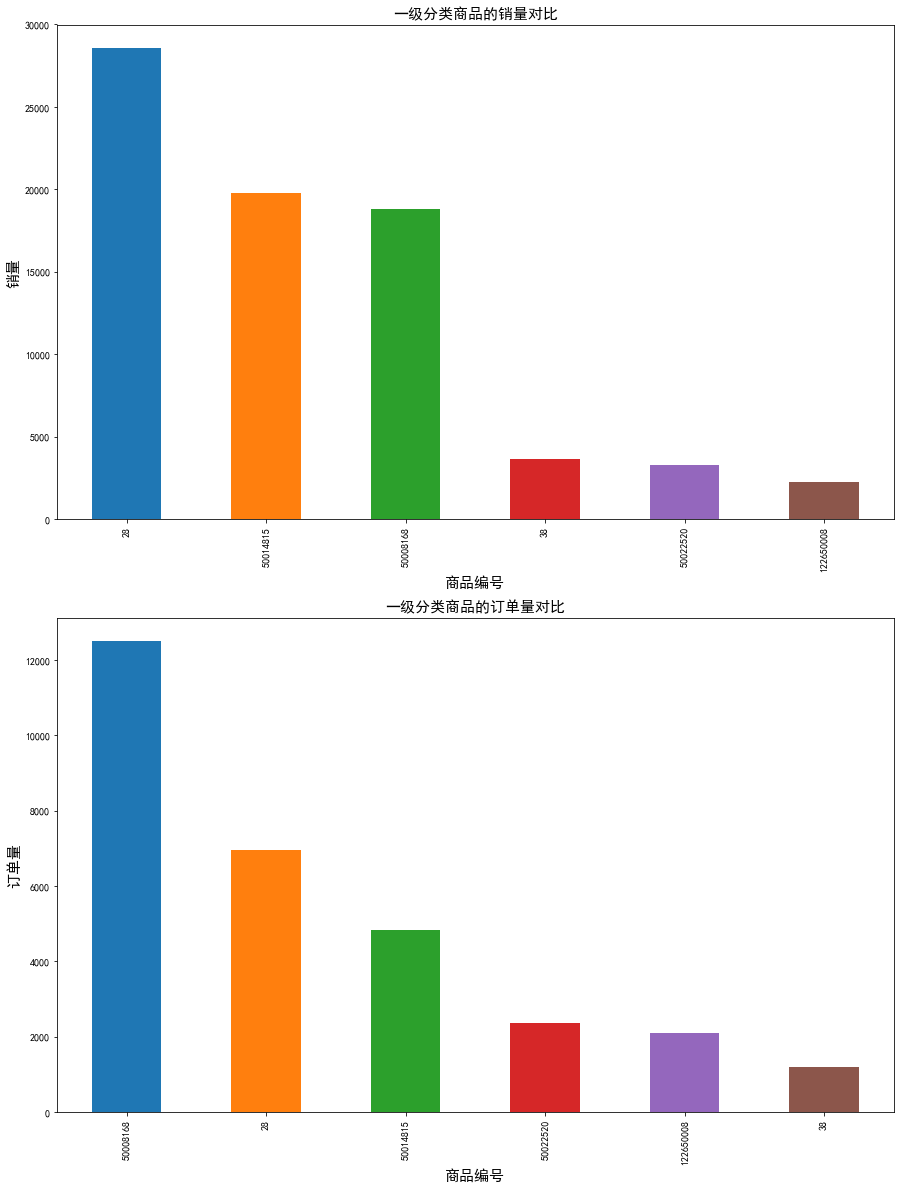

In [115]:
plt.figure(figsize=(15,20))
ax1 = plt.subplot(2,1,1)
amounts = data.groupby('cat1')['buy_mount'].sum().sort_values(ascending = False)
amounts.plot(kind = 'bar')
ax1.set_title('一级分类商品的销量对比',fontsize = 15)
ax1.set_xlabel('商品编号',fontsize = 15)
ax1.set_ylabel('销量',fontsize = 15)
ax2 = plt.subplot(2,1,2)
orders = data.groupby('cat1')['buy_mount'].count().sort_values(ascending = False)
orders.plot(kind = 'bar')
ax2.set_title('一级分类商品的订单量对比',fontsize = 15)
ax2.set_xlabel('商品编号',fontsize = 15)
ax2.set_ylabel('订单量',fontsize = 15)
plt.show


从图中可以看出 68结尾的商品，订单量是最大的，但是销量低于28产品，按照我们对于热销产品的定义，50008168为热销产品，这是商品一级分类，接下来分析该商品类下的二级分类订单量情况。

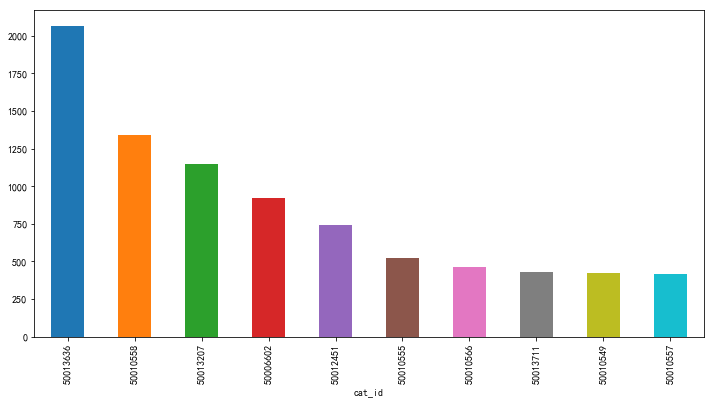

In [116]:
plt.figure(figsize=(12,6))
orders1 = data[data['cat1']==50008168].groupby('cat_id')['buy_mount'].count().sort_values(ascending = False).head(10)
orders1.plot(kind = 'bar')


接下来再看看该商品类在时间轴上的订单变化趋势

<function matplotlib.pyplot.show(*args, **kw)>

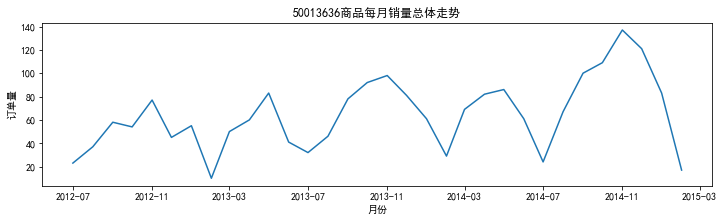

In [117]:
month_sale1 = data[data['cat_id']==50013636].groupby('YearMonth')['buy_mount'].count()
plt.figure(figsize=(12,3))
plt.plot(month_sale1)
plt.xlabel('月份')
plt.ylabel('订单量')
plt.title('50013636商品每月销量总体走势')
plt.show

可以看出50013636类的商品，订单量最高，而且从时间上看，在几次的促销活动中，它都有出色的表现，说明该商品类是热销产品，那就可以考虑，对该产品进行重点评估，下次的促销活动能够选择该商品类下的部分商品

- 针对不同用户群体，精准营销

不同年龄

这边计算的是购买商品时婴儿的年龄，因购买集中在0~4岁所以取这个年龄段分析，根据购买时间-出生时间这里的年龄是四舍五入取整的，0岁代表了一部分即将出生的婴儿和刚出生不久的婴儿，另外婴儿用品，一般作为家长的喜欢囤，所以这个只是估算婴儿的年龄来做的分析。

<function matplotlib.pyplot.show(*args, **kw)>

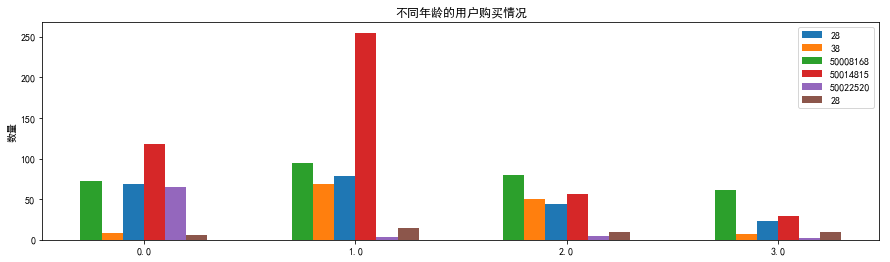

In [247]:
birthday = data['birthday1'].dropna().astype('str')
birthday = birthday.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
data['age'] = data['Year'] - birthday.map(lambda x:x.year)
data2 = data.dropna()
data2['age'].astype('int64')
data2 = data2[(data2['age']<4)&(data2['age']>-1)]
labels = np.array(data2.groupby('age').count().index)
y1 = data2[data2['cat1'] == 28].groupby(['cat1','age'])['buy_mount'].sum().values
y2 = data2[data2['cat1'] == 38].groupby(['cat1','age'])['buy_mount'].sum().values
y3 = data2[data2['cat1'] == 50008168].groupby(['cat1','age'])['buy_mount'].sum().values
y4 = data2[data2['cat1'] == 50014815].groupby(['cat1','age'])['buy_mount'].sum().values
y5 = data2[data2['cat1'] == 50022520].groupby(['cat1','age'])['buy_mount'].sum().values
y6 = data2[data2['cat1'] == 122650008].groupby(['cat1','age'])['buy_mount'].sum().values
x = np.arange(len(labels))
width = 0.1
fig,ax = plt.subplots(figsize = (15,4))
bar1 = ax.bar(x-width/2,y1,width,label = '28')
bar2 = ax.bar(x-width*1.5,y2,width,label = '38')
bar3 = ax.bar(x-width*2.5,y3,width,label = '50008168')
bar4 = ax.bar(x+width/2,y4,width,label = '50014815')
bar5 = ax.bar(x+width*1.5,y5,width,label = '50022520')
bar6 = ax.bar(x+width*2.5,y6,width,label = '28')
ax.set_ylabel('数量')
ax.set_title('不同年龄的用户购买情况')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show


可以看出，婴儿用品大部分集中在0岁到1岁之间，这里1代表的是半岁到1岁半之间的，0代表的是出生前后半岁的，那说明婴儿在出生前到1岁半之间购买量是最大的，并且对于15结尾的产品在0和1之间需求量很大

<function matplotlib.pyplot.show(*args, **kw)>

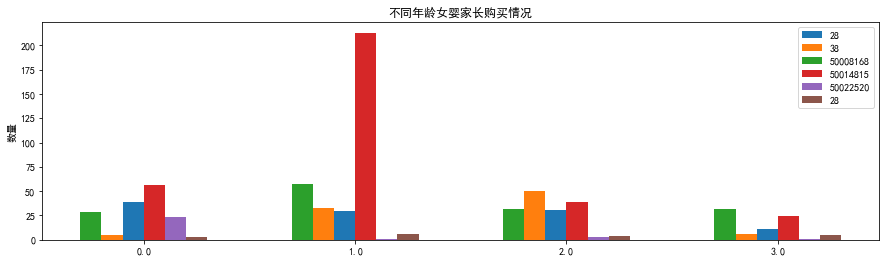

In [248]:
labels = np.array(data2.groupby('age').count().index)
y1 = data2[(data2['cat1'] == 28)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
y2 = data2[(data2['cat1'] == 38)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
y3 = data2[(data2['cat1'] == 50008168)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
y4 = data2[(data2['cat1'] == 50014815)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
y5 = data2[(data2['cat1'] == 50022520)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
y6 = data2[(data2['cat1'] == 122650008)&(data2['gender'] ==0)].groupby(['cat1','age'])['buy_mount'].sum().values
x = np.arange(len(labels))
width = 0.1
fig,ax = plt.subplots(figsize = (15,4))
bar1 = ax.bar(x-width/2,y1,width,label = '28')
bar2 = ax.bar(x-width*1.5,y2,width,label = '38')
bar3 = ax.bar(x-width*2.5,y3,width,label = '50008168')
bar4 = ax.bar(x+width/2,y4,width,label = '50014815')
bar5 = ax.bar(x+width*1.5,y5,width,label = '50022520')
bar6 = ax.bar(x+width*2.5,y6,width,label = '28')
ax.set_ylabel('数量')
ax.set_title('不同年龄女婴家长购买情况')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

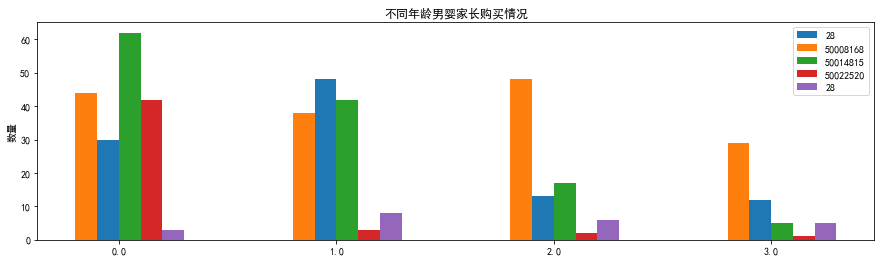

In [252]:
labels = np.array(data2.groupby('age').count().index)
y1 = data2[(data2['cat1'] == 28)&(data2['gender'] ==1)].groupby(['cat1','age'])['buy_mount'].sum().values
y3 = data2[(data2['cat1'] == 50008168)&(data2['gender'] ==1)].groupby(['cat1','age'])['buy_mount'].sum().values
y4 = data2[(data2['cat1'] == 50014815)&(data2['gender'] ==1)].groupby(['cat1','age'])['buy_mount'].sum().values
y5 = data2[(data2['cat1'] == 50022520)&(data2['gender'] ==1)].groupby(['cat1','age'])['buy_mount'].sum().values
y6 = data2[(data2['cat1'] == 122650008)&(data2['gender'] ==1)].groupby(['cat1','age'])['buy_mount'].sum().values
x = np.arange(len(labels))
width = 0.1
fig,ax = plt.subplots(figsize = (15,4))
bar1 = ax.bar(x-width/2,y1,width,label = '28')
bar3 = ax.bar(x-width*1.5,y3,width,label = '50008168')
bar4 = ax.bar(x+width/2,y4,width,label = '50014815')
bar5 = ax.bar(x+width*1.5,y5,width,label = '50022520')
bar6 = ax.bar(x+width*2.5,y6,width,label = '28')
ax.set_ylabel('数量')
ax.set_title('不同年龄男婴家长购买情况')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show

可以看出，女婴在1岁左右对于15结尾类商品需求量比较大，男婴在0-2岁对于68结尾的商品比较大，并且在0-1岁对各类商品的需求都不少。

- 不同性别

<function matplotlib.pyplot.show(*args, **kw)>

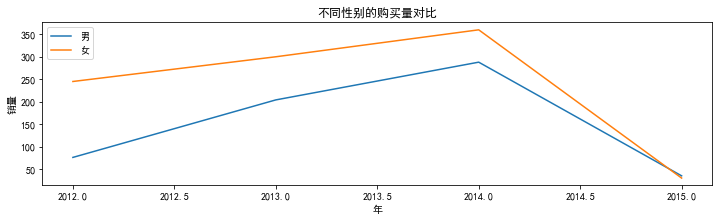

In [254]:
yearsale = data[data['gender'] == 1].groupby('Year')['buy_mount'].sum()
yearsale1 = data[data['gender'] == 0].groupby('Year')['buy_mount'].sum()
plt.figure(figsize=(12,3))
plt.plot(yearsale,label = '男')
plt.plot(yearsale1,label = '女')
plt.xlabel('年')
plt.ylabel('销量')
plt.title('不同性别的购买量对比')
plt.legend(loc = 2)
plt.show


可见女婴的购买力明显高于男生，因为2015年只有两个月的数据，所以不参与对比，从整体上销量随着时间的变化呈现上升趋势，说明母婴市场发展良好。

男婴和女婴对于商品类的偏好

<function matplotlib.pyplot.show(*args, **kw)>

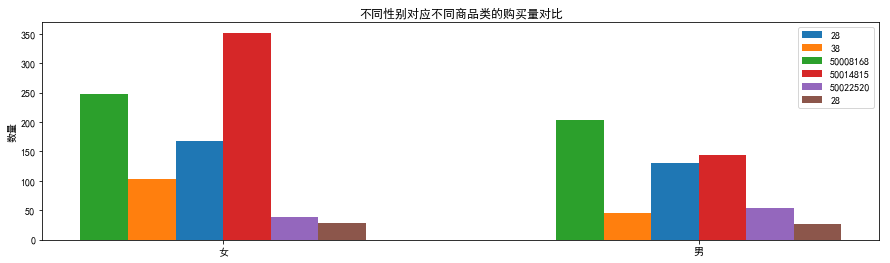

In [265]:
labels = np.array(data.groupby('gender').count().index)
y1 = data[data['cat1'] == 28].groupby('gender')['buy_mount'].sum().values
y2 = data[data['cat1'] == 38].groupby('gender')['buy_mount'].sum().values
y3 = data[data['cat1'] == 50008168].groupby('gender')['buy_mount'].sum().values
y4 = data[data['cat1'] == 50014815].groupby('gender')['buy_mount'].sum().values
y5 = data[data['cat1'] == 50022520].groupby('gender')['buy_mount'].sum().values
y6 = data[data['cat1'] == 122650008].groupby('gender')['buy_mount'].sum().values
x = np.arange(len(labels))
width = 0.1
fig,ax = plt.subplots(figsize = (15,4))
bar1 = ax.bar(x-width/2,y1,width,label = '28')
bar2 = ax.bar(x-width*1.5,y2,width,label = '38')
bar3 = ax.bar(x-width*2.5,y3,width,label = '50008168')
bar4 = ax.bar(x+width/2,y4,width,label = '50014815')
bar5 = ax.bar(x+width*1.5,y5,width,label = '50022520')
bar6 = ax.bar(x+width*2.5,y6,width,label = '28')
ax.set_ylabel('数量')
ax.set_title('不同性别对应不同商品类的购买量对比')
ax.set_xticks(x)
ax.set_xticklabels(['女','男'])
ax.legend()
plt.show

可以看出女婴对于15结尾类的商品购买量比较突出，男婴对于68结尾类的商品购买量相对较高，针对女婴，可以考虑对15结尾类商品的大力推广，68结尾类商品需求男女都有，说明是刚需，可以考虑通过更多的数据去分析相关性，搭配套餐带动其他产品的促销活动。

### 结论与建议：

1.促销活动一定要有针对性，**50013636类商品是热销商品**，评估后，可以采取相应的促销手段。

2.精准营销，针对需求的多少去针对性推送广告以此来减免广告费用，提高广告效率，对于**女婴产品可以集中在1岁进行15结尾类的商品进行推广，男婴产品可以在0-2岁集中推广。**

3.推广渠道按照年龄划分，**如果需求量在0-1岁比较大，线上推广可以结合母婴类APP在不同模块和功能点处进行针对性推广。**

4.**对于28的商品类和68结尾的商品类销量最大**，可以进行大力的宣传和推广，在保证产品质量的同时提高产品的销量。
